In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error

In [3]:
sbi_train = pd.read_csv("Train_SBI.csv")
sbi_train.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,19-Jun-23,EQ,571.25,572.75,565.90,571.25,569.20,568.85,568.29,629.55,430.7,"1,79,03,691","10,17,44,91,934.45","2,13,062"
1,20-Jun-23,EQ,568.85,569.45,562.55,568.85,568.00,567.40,565.75,629.55,430.7,"1,45,49,152","8,23,11,66,324.45","2,16,416"
2,21-Jun-23,EQ,567.40,569.50,565.65,567.40,566.30,566.35,567.46,629.55,430.7,"1,49,46,871","8,48,17,84,144.45","2,19,147"
3,22-Jun-23,EQ,566.35,569.00,561.05,566.35,562.90,562.95,564.62,629.55,430.7,"1,49,79,063","8,45,74,57,302.25","1,99,200"
4,23-Jun-23,EQ,562.00,562.10,553.80,562.95,555.45,554.60,556.89,629.55,430.7,"1,22,15,712","6,80,28,03,838.55","2,18,058"


In [4]:
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression

In [7]:
#Convert pandas DataFrame to Timeseries
y = TimeSeries.from_series(sbi_train["OPEN "])

In [31]:
#Holdout last 24 data points 
y_train = y[:-24]

#Specify and train model
Model = RegressionModel(
    lags = [-1,-2,-3],
    model = LinearRegression()
)

Model.fit(series=y_train)

RegressionModel(lags=[-1, -2, -3], lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, model=LinearRegression(), multi_models=True, use_static_covariates=True)

In [32]:
y_ypred = Model.predict(n=24, series=y_train)
Prediction = y_ypred.pd_dataframe()
Prediction = Prediction.iloc[:,0:1].values
Prediction

array([[779.08242587],
       [779.96555358],
       [781.03369463],
       [782.14101907],
       [783.24621658],
       [784.35058184],
       [785.45535088],
       [786.5605705 ],
       [787.66620959],
       [788.77226492],
       [789.87873729],
       [790.985627  ],
       [792.09293419],
       [793.20065902],
       [794.30880164],
       [795.41736221],
       [796.5263409 ],
       [797.63573785],
       [798.74555322],
       [799.85578718],
       [800.96643988],
       [802.07751148],
       [803.18900214],
       [804.30091201]])

# Getting the real price for test set of last 1 month

In [33]:
sbi_test = pd.read_excel("Test_SBI.xlsx")
SBI_Stock_price = sbi_test.iloc[:,2:3].values
SBI_Stock_price

array([[821.  ],
       [826.55],
       [824.7 ],
       [830.  ],
       [832.6 ],
       [835.7 ],
       [828.4 ],
       [821.4 ],
       [830.7 ],
       [863.55],
       [897.  ],
       [790.75],
       [800.  ],
       [819.9 ],
       [834.15],
       [836.  ],
       [837.  ],
       [845.  ],
       [845.  ],
       [841.55]])

# Getting the predicted stock price of last month

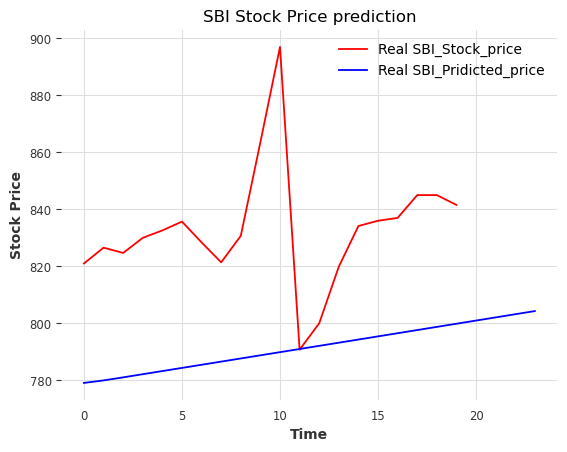

In [34]:
#Visualizing the results 

plt.plot(SBI_Stock_price, color = 'red', label = 'Real SBI_Stock_price')
plt.plot(Prediction, color = 'blue', label = 'Real SBI_Pridicted_price')
plt.title('SBI Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()